In [15]:
from pymatgen.ext.matproj import MPRester
from matplotlib import pyplot as plt
import numpy as np
from scipy import constants
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter

m          = MPRester("kqOngsaR68ix5AD46")
structure  = m.get_structure_by_material_id("mp-4280")
BandStruct = m.get_bandstructure_by_material_id("mp-4280")

bsp        = BSPlotter(BandStruct)
data       = bsp.bs_plot_data()
dist   = data['distances']   #abscisses : chaque tableau correspond à une branche 
energy = data['energy']      #ordonnées : chaque tableau correspond à une branche

A = BandStructure.get_vbm(BandStruct)["band_index"]    #indice de la bande correspondant au vbm : 20 ici
                                                       #par conséquent celle correspondant au cbm est 21

In [16]:
# on obtient le gap de deux façons différentes

# manière 1
gap = BandStruct.get_band_gap()
print('Informations sur la bande interdite : ' , gap)

# manière 2
vbm = data['vbm'][0]  ;  vbmEnergy = vbm[1]  # valence band maximum
cbm = data['cbm'][0]  ;  cbmEnergy = cbm[1]  # conduction band maximum
print('Energie de gap : ' , cbmEnergy - vbmEnergy)

Informations sur la bande interdite :  {'direct': False, 'energy': 0.7286999999999999, 'transition': '(0.580,0.420,0.000)-\\Gamma'}
Energie de gap :  0.7286999999999999


<Figure size 432x288 with 0 Axes>

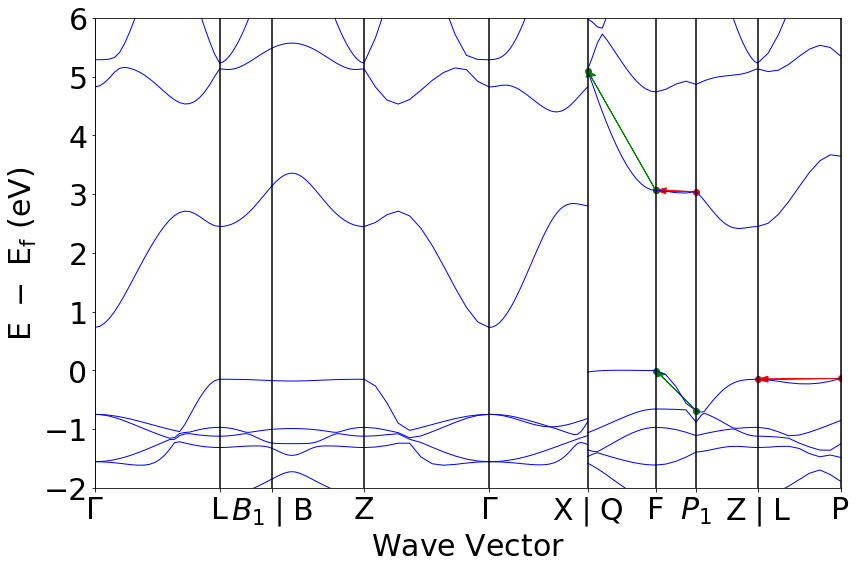

In [17]:
#calcul de la dispersion dans la première bande de conduction et dernière bande de valence
#la dispersion correspond à la pente des droites 



# cette fonction retourne l'indice de la branche à laquelle
# la pente la plus faible (extrema='min') ou la plus forte (extrema='max')
# de la bande de valence (vc='v') ou de conduction (vc='c')

def Indice(e,d,extrema,vc):
    
    indice = -1           #initialisation de l'indice
    Z = 20                #pour avoir la bande de valence
    if vc == 'c':
        Z += 1            #pour avoir la bande de conduction
    
    if extrema == 'max':
        ext = -1
        for i in range(0,len(dist)):
            d = dist[i] ; e = energy[i]['1'][Z]
            pente = (e[-1] - e[0]) / (d[-1] - d[0])
            
            if np.absolute(pente) > ext:
                ext    = np.absolute(pente)
                indice = i
                
    if extrema == 'min':
        ext = 10          
        for i in range(0,len(dist)):
            d = dist[i] ; e = energy[i]['1'][Z]
            pente = (e[-1] - e[0]) / (d[-1] - d[0])
            
            if np.absolute(pente) < ext:
                ext = np.absolute(pente)
                indice = i
                
    return indice #retourne l'indice de la branche recherchée

plt.figure("1")
bsp.get_plot(ylim=[-2,6])  #on resize les ordonnées pour mieux visualiser

#=========================le minimum de dispersion de la bande de valence===============================

indiceV = Indice(energy,dist,'min','v')
plt.scatter([dist[ indiceV ][0]] ,[energy[ indiceV ]['1'][20][0]] , c='red')  #on indique le point à gauche
plt.scatter([dist[ indiceV ][-1]],[energy[ indiceV ]['1'][20][-1]], c='red')  #on indique le point à droite

#les coordonnées de début et fin de la flèche
x1,y1,x2,y2 = dist[indiceV][0] , energy[indiceV]['1'][20][0] , dist[indiceV][-1] , energy[indiceV]['1'][20][-1]

#on trace la flèche
plt.arrow(x2,y2,x1-x2,y1-y2 ,head_width=0.1, head_length=0.1 , length_includes_head=True , color='red')

#=========================le maximum de dispersion de la bande de valence===============================

indiceV = Indice(energy,dist,'max','v')
plt.scatter([dist[ indiceV ][0]] ,[energy[ indiceV ]['1'][20][0]] , c='green')
plt.scatter([dist[ indiceV ][-1]],[energy[ indiceV ]['1'][20][-1]], c='green')

x1,y1,x2,y2 = dist[indiceV][0] , energy[indiceV]['1'][20][0] , dist[indiceV][-1] , energy[indiceV]['1'][20][-1]
plt.arrow(x2,y2,x1-x2,y1-y2 ,head_width=0.1, head_length=0.1 , length_includes_head=True , color='green')

#=========================le minimum de dispersion de la bande de conduction===============================

indiceC = Indice(energy,dist,'min','c')
plt.scatter([dist[ indiceC ][0]] ,[energy[ indiceC ]['1'][21][0]] , c='red')
plt.scatter([dist[ indiceC ][-1]],[energy[ indiceC ]['1'][21][-1]], c='red')

x1,y1,x2,y2 = dist[indiceC][0] , energy[indiceC]['1'][21][0] , dist[indiceC][-1] , energy[indiceC]['1'][21][-1]
plt.arrow(x2,y2,x1-x2,y1-y2 ,head_width=0.1, head_length=0.1 , length_includes_head=True , color='red')

#=========================le maximum de dispersion de la bande de conduction===============================


indiceC = Indice(energy,dist,'max','c')
plt.scatter([dist[ indiceC ][0]] ,[energy[ indiceC ]['1'][21][0]] , c='green')
plt.scatter([dist[ indiceC ][-1]],[energy[ indiceC ]['1'][21][-1]], c='green')

x1,y1,x2,y2 = dist[indiceC][0] , energy[indiceC]['1'][21][0] , dist[indiceC][-1] , energy[indiceC]['1'][21][-1]
plt.arrow(x2,y2,x1-x2,y1-y2 ,head_width=0.1, head_length=0.1 , length_includes_head=True , color='green')

#================================================================

plt.show()

<Figure size 432x288 with 0 Axes>

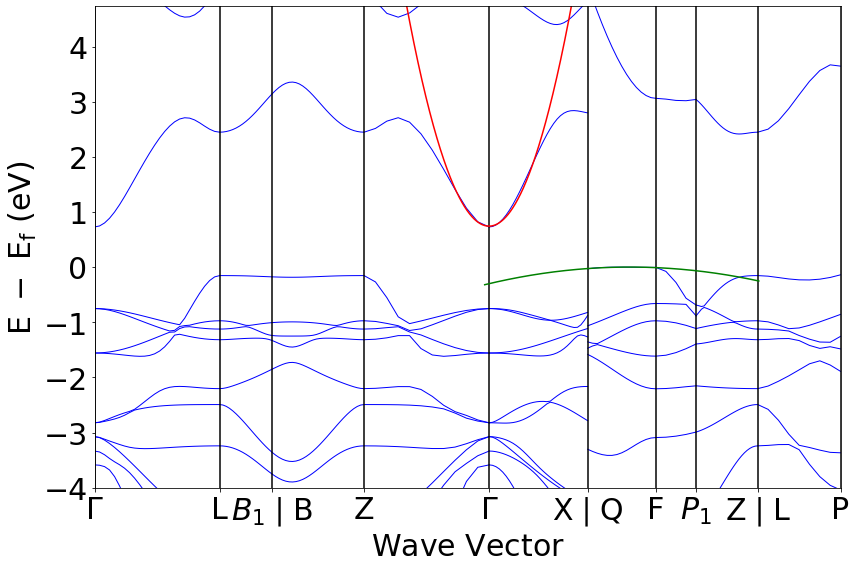

Rapport de la masse effective avec la masse de l electron dans le vide
 - pour la bande de valence -23.644716750788252
 - pour la bande de valence 0.6108202334999975


In [14]:
#Calcul de la masse effective

IndexV = BandStructure.get_vbm(BandStruct)["band_index"] #indice de la bande correspondant au vbm : 20 ici

#================pour le vbm : valence band max================

E1     = energy[5]['1'][20]                           #l'énergie de la branche et de la bande qui contient vbm
dist1  = dist[5]                                      #les distances auxquelles on évalue l'énergie

polyn1 = np.polyfit(dist1,E1,2)                       #coef du polynome
xplot1 = np.linspace(dist1[0]-1.,dist1[-1]+1.,1000)   #abscisses de la parabole
yplot1 = np.polyval(polyn1,xplot1)                    #ordonnées de la parabole

#================pour le cbm : conduction band min=============

#le cbm est entre deux branches : il faut considérer l'énergie et la distance des deux côtés
# on sélectionne donc autant de points à gauche qu'à droite pour faire l'approximation

E2     = np.append( energy[3]['1'][21][8:] , energy[4]['1'][21][1:5] )
dist2  = np.append( dist[3][8:] , dist[4][1:5] )      

polyn2 = np.polyfit(dist2,E2,2)                       #coef du polynome
xplot2 = np.linspace(dist2[0]-.5,dist2[-1]+1.,1000)   #abscisses de la parabole
yplot2 = np.polyval(polyn2,xplot2)                    #ordonnées de la parabole

plt.figure("2")
bsp.get_plot()
plt.plot(xplot1,yplot1,'-g')
plt.plot(xplot2,yplot2,'-r')

plt.show()

#==========================calcul de la masse effective=============================

# m_effective = (h barre)² / (dérivée seconde de l'énergie selon k)
# unités : masse effective = (J.s)² / (eV/A²) = kg / (angstrom . 1.602e-19)
# on corrige les unités avec le facteur (Angstrom)² * (charge électron)
M_vide = 9.109 * 10 **(-31)
Mval   = (constants.hbar)**2 / (2*polyn1[0]) / (1e-20 * 1.602e-19)
Mcon   = (constants.hbar)**2 / (2*polyn2[0]) / (1e-20 * 1.602e-19)

# rapport des masses effectives avec la masse dans le vide de l'electron
print('Rapport de la masse effective avec la masse de l electron dans le vide')
print(' - pour la bande de valence' , Mval / M_vide)
print(' - pour la bande de valence' , Mcon / M_vide)